In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Data
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
sample = pd.read_csv('sample_submission_49d68Cx.csv')

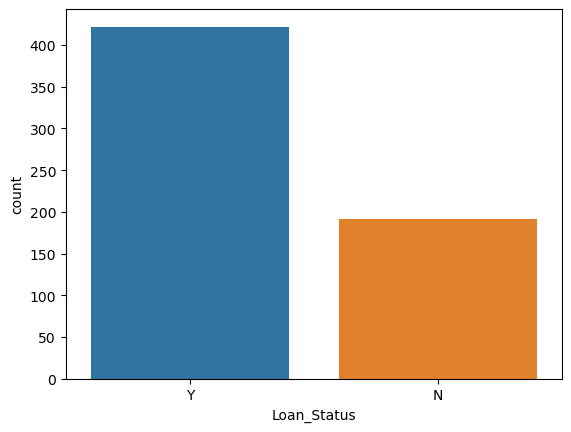

In [26]:
ax = sns.countplot(x='Loan_Status', data=train)

In [36]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

[Text(0, 0, '422'), Text(0, 0, '192')]

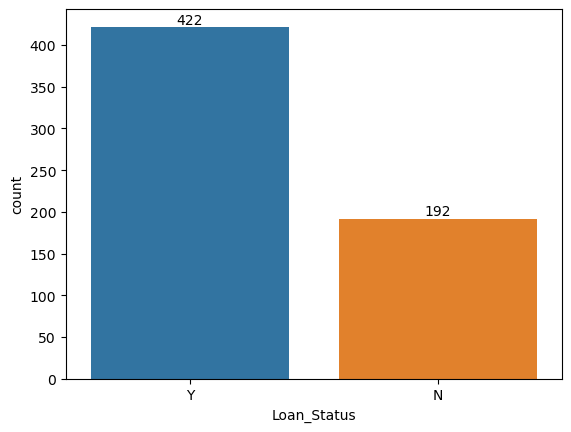

In [14]:
#Exploratory Data Analysis
ax = sns.countplot(x='Loan_Status', data=train)
ax.bar_label(ax.containers[0])

In [16]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

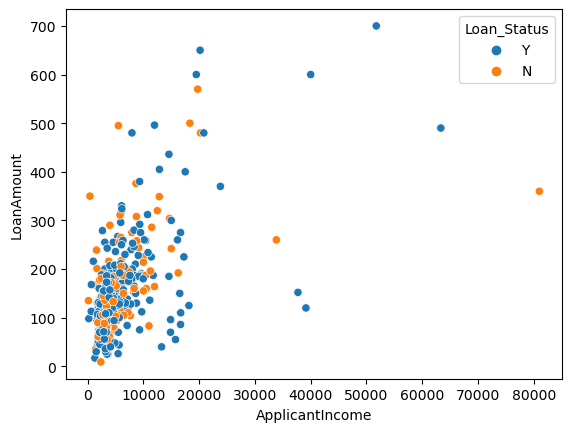

In [18]:
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', hue = 'Loan_Status', data = train )

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

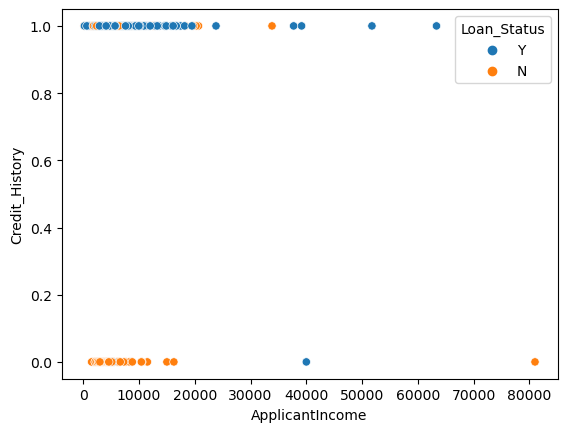

In [20]:
sns.scatterplot(x = 'ApplicantIncome', y = 'Credit_History', hue = 'Loan_Status', data = train )

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

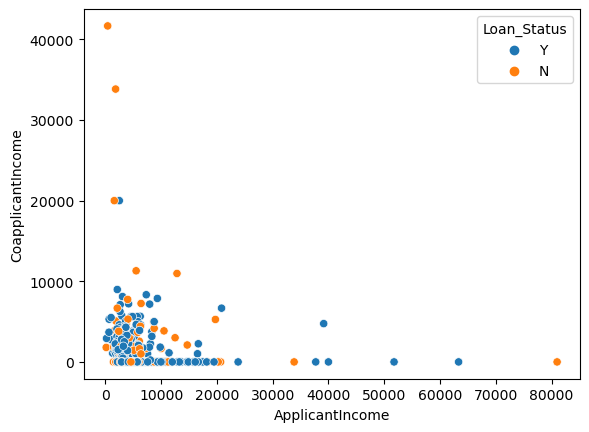

In [22]:
sns.scatterplot(x = 'ApplicantIncome', y = 'CoapplicantIncome', hue = 'Loan_Status', data = train )

<Axes: xlabel='LoanAmount', ylabel='Self_Employed'>

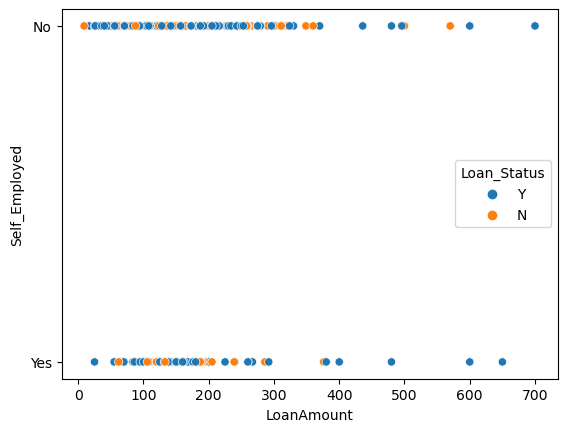

In [24]:
sns.scatterplot(x = 'LoanAmount', y = 'Self_Employed', hue = 'Loan_Status', data = train )

In [40]:
train.groupby('Education')['Loan_Status'].value_counts(normalize = True)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: proportion, dtype: float64

In [42]:
train.groupby('Self_Employed')['Loan_Status'].value_counts(normalize = True)

Self_Employed  Loan_Status
No             Y              0.686000
               N              0.314000
Yes            Y              0.682927
               N              0.317073
Name: proportion, dtype: float64

In [44]:
train.groupby('Married')['Loan_Status'].value_counts(normalize = True)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: proportion, dtype: float64

In [48]:
train.groupby(['Education', 'Married'])['Loan_Status'].value_counts(normalize = True)

Education     Married  Loan_Status
Graduate      No       Y              0.630952
                       N              0.369048
              Yes      Y              0.747573
                       N              0.252427
Not Graduate  No       Y              0.622222
                       N              0.377778
              Yes      Y              0.606742
                       N              0.393258
Name: proportion, dtype: float64

In [50]:

train.groupby(['Education', 'Married','Property_Area'])['Loan_Status'].value_counts(normalize = True)

Education     Married  Property_Area  Loan_Status
Graduate      No       Rural          Y              0.608696
                                      N              0.391304
                       Semiurban      Y              0.666667
                                      N              0.333333
                       Urban          Y              0.610169
                                      N              0.389831
              Yes      Rural          Y              0.658824
                                      N              0.341176
                       Semiurban      Y              0.819672
                                      N              0.180328
                       Urban          Y              0.735294
                                      N              0.264706
Not Graduate  No       Rural          Y              0.588235
                                      N              0.411765
                       Semiurban      Y              0.823529
                    

In [52]:
train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize = True)

Property_Area  Loan_Status
Rural          Y              0.614525
               N              0.385475
Semiurban      Y              0.768240
               N              0.231760
Urban          Y              0.658416
               N              0.341584
Name: proportion, dtype: float64

In [54]:
train.groupby(['Dependents'])['Loan_Status'].value_counts(normalize = True)

Dependents  Loan_Status
0           Y              0.689855
            N              0.310145
1           Y              0.647059
            N              0.352941
2           Y              0.752475
            N              0.247525
3+          Y              0.647059
            N              0.352941
Name: proportion, dtype: float64

In [60]:
grouped = train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

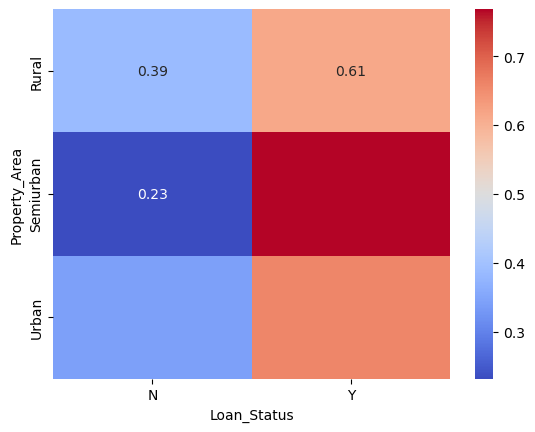

In [70]:
sns.heatmap(grouped, cmap= 'coolwarm', cbar=True, annot=True )

In [110]:
grouped = train.groupby(['Education', 'Married','Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Education-Married-Property_Area'>

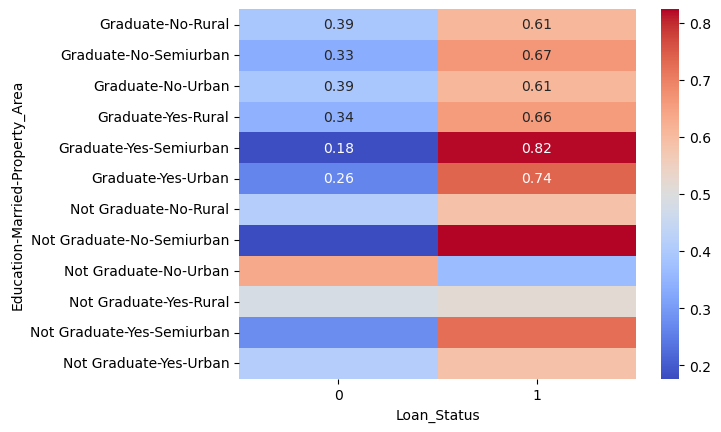

In [124]:
sns.heatmap(grouped, cmap= 'coolwarm', cbar=True, annot=True )

<Axes: xlabel='Education,Married,Property_Area'>

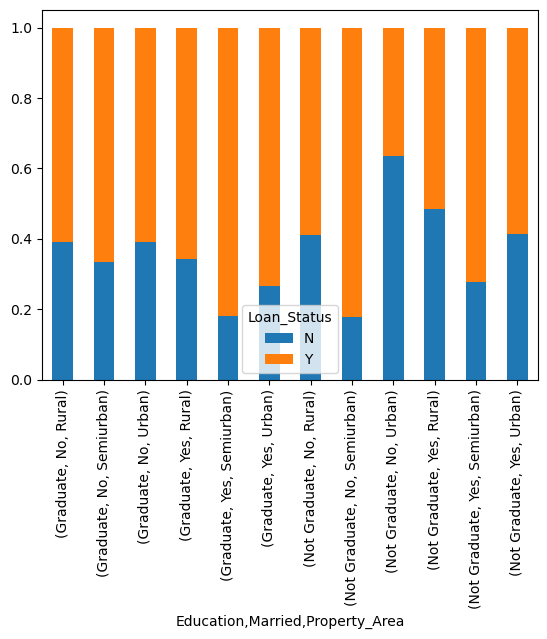

In [90]:
grouped.plot(kind = 'bar', stacked = True)

In [102]:
train['Loan_Status'].replace({'Y':1, 'N': 0}, inplace = True)

In [104]:
train.select_dtypes(include=np.number).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

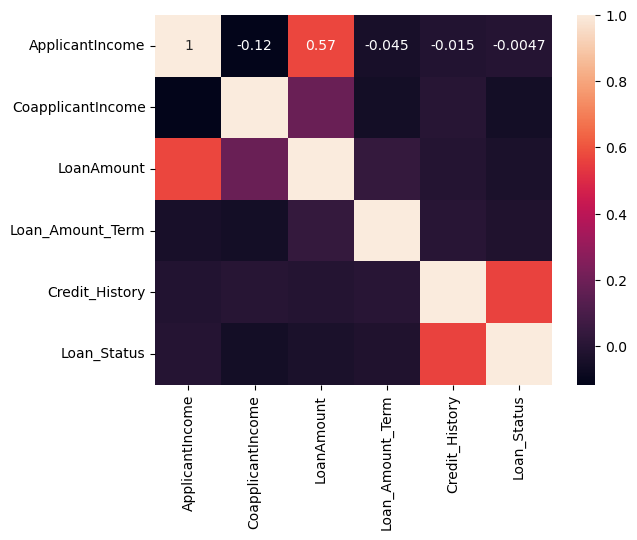

In [108]:
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot = True)